# **Linear Regresion with PyTorch**


The dataset selected for this notebook is the Titanic dataset. 

This dataset has several information where each row represents one person. The columns describe different attributes about the person including whether they survived, their age, their passenger-class, their sex, and the fare they paid. Finally the dataset is devided in training and evaluation data.

The training and evaluation data can be found in the following links:

*   Training data: https://storage.googleapis.com/tf-datasets/titanic/train.csv
*   Evaluation data: https://storage.googleapis.com/tf-datasets/titanic/eval.csv

This notebook is focused in the prediction of wheather a passenger survived or not, and it is build based on the following steps:

1.   Install depencies
2.   Import modules
3. Download and dataset analysis
4. Preparing the dataset for training
5. Creating a Linear Regression model
6. Training the model and fitting the data
7. Making predictions using the trained model
8. Saving the model
9. Commiting and uploading the notebook

This notebook is based on the concepts from the first two lectures and as part of the Assignment 2 of the course Deep Learning with PyTorch, which you can find in the following links:

* Assignment 2 - Linear Regression: [click here](https://jovian.ml/fabianac07/assingment-02-linear-regression)  
* Lecture 1: [click here](https://www.youtube.com/watch?v=vo_fUOk-IKk&list=LLaHOyHOvwkyZZw6dTitN1Vw&index=2&t=443s)
* Lecture 2: [click here](https://www.youtube.com/watch?v=4ZZrP68yXCI)
* PyTorch basics: https://jovian.ml/aakashns/01-pytorch-basics
* Linear Regression: https://jovian.ml/aakashns/02-linear-regression
* Logistic Regression: https://jovian.ml/aakashns/03-logistic-regression
* Linear regression (minimal): https://jovian.ml/aakashns/housing-linear-minimal
* Logistic regression (minimal): https://jovian.ml/aakashns/mnist-logistic-minimal


#### Step 1: Install dependencies

In [1]:
# Uncomment and run the commands below if imports fail
# !conda install numpy pytorch torchvision cpuonly -c pytorch -y
# !pip install matplotlib --upgrade --quiet
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 92kB 2.4MB/s 


#### Step 2: Import Modules

In [2]:
import torch
import jovian
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Step 3: Download and Dataset Analysis 

To download the dataset the pandas `read_csv()` method is used. This method will download the dataset and turn it into a table. 

In [0]:
''' Load dataset '''
dataset_training = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dataset_testing = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

It is possible to observe the data using pandas methods. 
The `.head()` method shows the first 5 items in the dataset.

In [4]:
dataset_training.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [5]:
dataset_testing.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


The `.describe()` method shows an statistical analysis of the dataset.

In [6]:
dataset_training.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


In [7]:
dataset_testing.describe()

,survived,age,n_siblings_spouses,parch,fare
count,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.375000,28.720985,0.469697,0.386364,27.023880
std,0.485042,14.157538,0.978393,0.837775,34.973108
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,28.000000,0.000000,0.000000,13.250000
75%,1.000000,35.250000,1.000000,0.000000,27.900000
max,1.000000,74.000000,8.000000,6.000000,263.000000


Machine learning is all about data, for this reason is very important to know what kind and how many data is available. 

For this reason is important to answer the following questions:

***Q: How many rows does the training dataset have?***

In [8]:
num_rows = len(dataset_training.index)
print('The number of rows on the training dataset is: ', num_rows)

The number of rows on the training dataset is:  627


***Q: How many columns does the training dataset have?***

In [9]:
num_cols = len(dataset_training.columns)
print('The number of columns on the training dataset is: ', num_cols)

The number of columns on the training dataset is:  10


***Q: What are the column titles of the input variables?***

In [10]:
input_cols = dataset_testing.columns.values[1:]
print('The columns titles of the input variables on the testing dataset are: ')
print(input_cols)

The columns titles of the input variables on the testing dataset are: 
['sex' 'age' 'n_siblings_spouses' 'parch' 'fare' 'class' 'deck'
 'embark_town' 'alone']


***Q: What is the column title of the output/target variable in the training dataset?***

---



In [11]:
output_cols = dataset_training.columns.values[:1]
print('The target column title on the training dataset is: ', output_cols)

The target column title on the training dataset is:  ['survived']


***Q: Which of the input columns are categorical (on-numerical variables) in the training dataset?***

In [12]:
categorical_cols = dataset_training.select_dtypes(include=object).columns.values
print('The non-numerical columns in the training dataset are: ')
print(categorical_cols)

The non-numerical columns in the training dataset are: 
['sex' 'class' 'deck' 'embark_town' 'alone']


***Q: How would you plot the distributions of survivors and age of the passengers?***

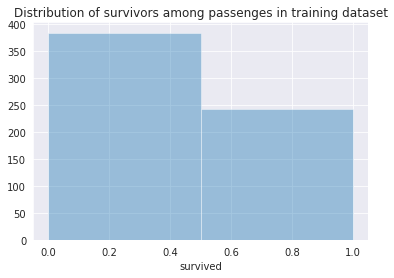

In [13]:
sns.set_style('darkgrid')
plt.title('Distribution of survivors among passenges in training dataset')
sns.distplot(dataset_training.survived, bins=2, kde=False);

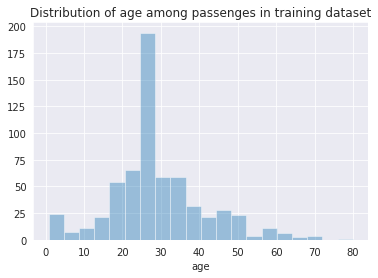

In [14]:
sns.set_style('darkgrid')
plt.title('Distribution of age among passenges in training dataset')
sns.distplot(dataset_training.age, bins=20, kde=False);

#### Step 4: Preparing the Dataset for Training

By this point it was observed that the data has been handle in Pandas form. To process the training data, it has to be converted into PyTorch tensors. 

To do so, it is necessary to convert it to numpy arrayas, and the following function will do that for us:

*To understand how tha categorical data is converted into numbers refer to [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html).*

In [0]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

Now it is just a matter to pass trough the `dataframe_to_arrays` function the training dataset.

In [16]:
inputs_array_training, targets_array_training = dataframe_to_arrays(dataset_training)
print(inputs_array_training)
print(targets_array_training)

[[ 1. 22.  1. ...  7.  2.  0.]
 [ 0. 38.  1. ...  2.  0.  0.]
 [ 0. 26.  0. ...  7.  2.  1.]
 ...
 [ 0. 19.  0. ...  1.  2.  1.]
 [ 0. 28.  1. ...  7.  2.  0.]
 [ 1. 32.  0. ...  7.  1.  1.]]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0

In [17]:
inputs_array_testing, targets_array_testing = dataframe_to_arrays(dataset_testing)
print(inputs_array_testing)
print(targets_array_testing)

[[ 1. 35.  0. ...  6.  2.  1.]
 [ 1. 54.  0. ...  4.  2.  1.]
 [ 0. 58.  0. ...  2.  2.  1.]
 ...
 [ 0. 39.  0. ...  6.  1.  0.]
 [ 1. 27.  0. ...  6.  2.  1.]
 [ 1. 26.  0. ...  2.  0.  1.]]
[[0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0

The next thing to do is to convert the numpy arrays into PyTorch tensors.

*NOTE: The tensor data type must be `torch.float32`*

In [18]:
# Import from numpy arrays to pytorch
inputs_training = torch.from_numpy(inputs_array_training).type(torch.float32)
targets_training = torch.from_numpy(targets_array_training).type(torch.float32)
inputs_training.dtype, targets_training.dtype

(torch.float32, torch.float32)

In [19]:
inputs_testing = torch.from_numpy(inputs_array_testing).type(torch.float32)
targets_testing = torch.from_numpy(targets_array_testing).type(torch.float32)
inputs_testing.dtype, targets_testing.dtype

(torch.float32, torch.float32)

Now, create PyTorch datasets for training and validation

In [0]:
train_dataset = TensorDataset(inputs_training, targets_training)
val_dataset = TensorDataset(inputs_testing, targets_testing)

Finally, create dataloaders for training and validation.

To do so, it is necessary to select a batch size for the data loader. This means that the loader will not feed the whole dataset to the model at once, but it will feed the model with small entries.

In [0]:
# Batch Size for data loader
batch_size = 64

In [0]:
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size*2)

It is possible to verify that the data loader worked well by running the following loop:

In [23]:
print('Data inside the training data loader: ')
for x_i, y_i in train_loader:
  print("inputs", x_i)
  print("targets", y_i)
  break

Data inside the training data loader: 
inputs tensor([[  0.0000,  30.0000,   0.0000,   0.0000,   8.6625,   2.0000,   7.0000,
           2.0000,   1.0000],
        [  0.0000,  22.0000,   0.0000,   0.0000, 151.5500,   0.0000,   7.0000,
           2.0000,   1.0000],
        [  1.0000,  28.5000,   0.0000,   0.0000,   7.2292,   2.0000,   7.0000,
           0.0000,   1.0000],
        [  1.0000,  36.0000,   0.0000,   0.0000,  10.5000,   1.0000,   7.0000,
           2.0000,   1.0000],
        [  0.0000,  38.0000,   0.0000,   0.0000,  80.0000,   0.0000,   1.0000,
           3.0000,   1.0000],
        [  0.0000,  31.0000,   1.0000,   0.0000, 113.2750,   0.0000,   3.0000,
           0.0000,   0.0000],
        [  1.0000,  28.0000,   0.0000,   0.0000,   0.0000,   1.0000,   7.0000,
           2.0000,   1.0000],
        [  1.0000,  22.0000,   0.0000,   0.0000,   7.2500,   2.0000,   7.0000,
           2.0000,   1.0000],
        [  0.0000,  22.0000,   0.0000,   2.0000,  49.5000,   0.0000,   1.0000,
   

In [24]:
print('Data inside the validation data loader: ')
for x_o, y_o in val_loader:
  print("inputs", x_o)
  print("targets", y_o)
  break

Data inside the validation data loader: 
inputs tensor([[ 1., 35.,  0.,  ...,  6.,  2.,  1.],
        [ 1., 54.,  0.,  ...,  4.,  2.,  1.],
        [ 0., 58.,  0.,  ...,  2.,  2.,  1.],
        ...,
        [ 1., 28.,  0.,  ...,  6.,  2.,  1.],
        [ 0., 50.,  0.,  ...,  6.,  2.,  1.],
        [ 1., 28.,  0.,  ...,  6.,  1.,  1.]])
targets tensor([[0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0

#### Step 5: Creating the Linear Regression Model

This a fairly straightforward linear regression model. 

First, it is necessary to define how many columns are in the input and output variables.

In [25]:
input_size = len(input_cols)
output_size = len(output_cols)
input_cols, output_cols

(array(['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class',
        'deck', 'embark_town', 'alone'], dtype=object),
 array(['survived'], dtype=object))

Second, it is necesary to define a class where the model will be build.



In [0]:
class TitanicModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size) 
        
    def forward(self, xb):
        out = self.linear(xb)                          
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        #loss = F.l1_loss(out, targets) 
        loss = F.mse_loss(out, targets)                          
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        #loss = F.l1_loss(out, targets)   
        loss = F.mse_loss(out, targets)                           
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean() 
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

Then, it is just a matter of build the model and check its initial weights and biases.

In [0]:
model = TitanicModel()

In [28]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1652,  0.0280,  0.2494, -0.2080,  0.2956,  0.1605, -0.0413,  0.3330,
          -0.1175]], requires_grad=True), Parameter containing:
 tensor([0.1035], requires_grad=True)]

#### Step 6: Training the Model and Fitting the Data

To train the model, it is necesary to define the `evaluate` function, which will perform the validation of the model, and the `fit` function, which will perform the training process.

In [0]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

The `fit` function records the validation loss and metric from each epoch and returns a history of the training process. This is useful for debuggin & visualizing the training process. 

Configurations like batch size and learning rate need to be selected in advance while training machine learning models, and are called hyperparameters. 

Selecting the right hyperparameters is critical for training an accurate model within a reasonable amount of time, and is an active area of research and experimentation. Feel free to try different learning rates and see how it affects the training process.

In [30]:
result = evaluate(model, val_loader) # Use the the evaluate function
print(result)

{'val_loss': 185.7541961669922}


At this point the model is ready to be trained.It may be necessary to run the training loops many times, for different number of epochs and with different learning rates, to get a good result. 

*NOTE: If the loss becomes too large (or `nan`), it might be necessary to re-initialize the model by running the cell `model = InsuranceModel()`.*

In [31]:
epochs = 100
lr = 1e-4
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 0.6428
Epoch [40], val_loss: 0.5909
Epoch [60], val_loss: 0.7017
Epoch [80], val_loss: 0.5255
Epoch [100], val_loss: 0.4987


In [32]:
epochs = 100
lr = 1e-4
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 0.4799
Epoch [40], val_loss: 0.4913
Epoch [60], val_loss: 0.4446
Epoch [80], val_loss: 0.4453
Epoch [100], val_loss: 0.4254


In [33]:
epochs = 100
lr = 1e-5
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 0.4177
Epoch [40], val_loss: 0.4157
Epoch [60], val_loss: 0.4153
Epoch [80], val_loss: 0.4134
Epoch [100], val_loss: 0.4119


In [34]:
epochs = 100
lr = 1e-5
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 0.4108
Epoch [40], val_loss: 0.4098
Epoch [60], val_loss: 0.4089
Epoch [80], val_loss: 0.4076
Epoch [100], val_loss: 0.4072


In [35]:
epochs = 100
lr = 1e-6
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 0.4062
Epoch [40], val_loss: 0.4060
Epoch [60], val_loss: 0.4058
Epoch [80], val_loss: 0.4057
Epoch [100], val_loss: 0.4056


Once the model is trained, it might be necesary to report the final validation loss of the model.

In [36]:
val_loss = history5[-1]
print('The final validation loss is: ', val_loss)

The final validation loss is:  {'val_loss': 0.405606746673584}


If it is necessary to plot the whole training history, it would be just a matter to run the following lines.

Text(0, 0.5, 'losses')

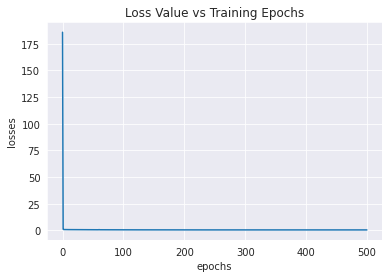

In [37]:
whole_history = [result] + history1 + history2 + history3 + history4 + history5
losses = [r['val_loss'] for r in whole_history]

plt.plot(losses)
plt.grid('on')
plt.title('Loss Value vs Training Epochs')
plt.xlabel('epochs')
plt.ylabel('losses')

#### Step 7: Making Predictions Using the Trained Model

To make predictions using the trained model it would be necesary to define the `predict_single` function, which will take as input a row from the validation dataset and make the prediction of whether the passenger survived or not.

In [0]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(input)                # fill this
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)
    if prediction >= 0.5:
      print('The passenger survived!')
    else:
      print('Tha passenger did not survived...')


To see if the predictions are correct, it is possible to print the frist 5 rows of the testing dataset

In [39]:
dataset_testing.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


Now, it is just a matter of selecting which row of the validation dataset will pass throught the `predict_single` function.

In [40]:
input, target = val_dataset[0]
predict_single(input, target, model)

Input: tensor([ 1.0000, 35.0000,  0.0000,  0.0000,  8.0500,  2.0000,  6.0000,  2.0000,
         1.0000])
Target: tensor([0.])
Prediction: tensor(0.4714)
Tha passenger did not survived...


In [41]:
input, target = val_dataset[1]
predict_single(input, target, model)

Input: tensor([ 1.0000, 54.0000,  0.0000,  0.0000, 51.8625,  0.0000,  4.0000,  2.0000,
         1.0000])
Target: tensor([0.])
Prediction: tensor(0.5506)
The passenger survived!


In [42]:
input, target = val_dataset[2]
predict_single(input, target, model)

Input: tensor([ 0.0000, 58.0000,  0.0000,  0.0000, 26.5500,  0.0000,  2.0000,  2.0000,
         1.0000])
Target: tensor([1.])
Prediction: tensor(0.5233)
The passenger survived!


#### Step 8: Saving the Model

To save the model, it is just a matter to run the following lines. This will save the model in the local folder and it is possible to load it in the future. 

This will save time and computational resourses.

In [0]:
torch.save(model.state_dict(), 'titanic_linear_regresion_model.pth')

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model.

In [44]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0916,  0.0020,  0.1306, -0.1942,  0.0030,  0.1127, -0.0668,  0.2376,
                       -0.1172]])),
             ('linear.bias', tensor([0.1039]))])

To load the model weights, it is just a matter of creating a new object of the class `TitanicModel`, and use the `.load_state_dict` method.

In [45]:
model2 = TitanicModel()
model2.load_state_dict(torch.load('titanic_linear_regresion_model.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0916,  0.0020,  0.1306, -0.1942,  0.0030,  0.1127, -0.0668,  0.2376,
                       -0.1172]])),
             ('linear.bias', tensor([0.1039]))])

Finally, it is possible to verify that the model has the same loss than in the validation test above

In [46]:
test_loader = DataLoader(val_dataset, batch_size=32)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.33652156591415405}

#### Step 9: Commit and Upload the Notebook

In [47]:
jovian.commit(project='titanic-linear-regression', environment=None, outputs=['titanic_linear_regresion_model.pth'])

[jovian] Error: Failed to detect Jupyter notebook or Python script. Skipping..


## Summary and Further Reading

In this notebook a simple linear regression model created in PyTorch is preseted. The list of the topics covered is the following:



*   Download and access data using Pandas
*   Creation of Linear Models with PyTorch
*   How to fit and train the linear model
*   How to test the trained model
*   How to save the model for further usage

There is a fairly amount of data and code to experiment in this notebook. It is open for the readers to modify it and play arround with the model.

Finally, here are some references and links for further reading:



1.   Free Course - [Deep Learning with PyTorch](https://www.youtube.com/playlist?list=LLaHOyHOvwkyZZw6dTitN1Vw) 
2.   Learn more about [Linear Regression](https://en.wikipedia.org/wiki/Linear_regression#:~:text=In%20statistics%2C%20linear%20regression%20is,is%20called%20simple%20linear%20regression.)
3.   Course Notes - [CS109: Intro to Probability for Computer Scientists](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/)
4.   [A Titanic Probability](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html)



